# **Deep Learning Programming with Python**
### Week5: DataLoader & Backpropagation

**Acknowledgement**

Many of Today's contents are adopted from the below resources:

1. [Hands-On Machine Learning with Scikit-Learn, Keras & Tensorflow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)
2. https://www.python-course.eu/machine_learning_data_visualization.php
3. http://yann.lecun.com/exdb/mnist/
4. https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
5. https://pytorch.org/vision/0.8/transforms.html
6. https://stanford.edu/~shervine/blog/pytorch-how-to-generate-data-parallel
7. https://colab.research.google.com/github/jigsawlabs-student/pytorch-intro-curriculum/blob/main/5-training-mathematically/20-backpropagation-and-gradient-descent.ipynb#scrollTo=inner-light
---

##1. Get the data
### 1.1 A collection of ready-to-use datasets (scikit-learn, Tensorflow, and Pytorch)

### (Example 1) Digits dataset for Recognizing hand-written digits
> Data Set Information:
>
> The digits dataset consists of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each image.

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

# Let's have a look at the number of items and features:
n_samples, n_features = digits.data.shape
print((n_samples, n_features))

# The data is also available at digits.images. This is the raw data of the images in the form of 8 lines and 8 columns.
# With "data" an image corresponds to a one-dimensional Numpy array with the length 64, and "images" representation contains 2-dimensional numpy arrays with the shape (8, 8)
print("Shape of an item: ", digits.data[0].shape)
print("Data type of an item: ", type(digits.data[0]))
print("Shape of an item: ", digits.images[0].shape)
print("Data tpye of an item: ", type(digits.images[0]))

(1797, 64)
Shape of an item:  (64,)
Data type of an item:  <class 'numpy.ndarray'>
Shape of an item:  (8, 8)
Data tpye of an item:  <class 'numpy.ndarray'>


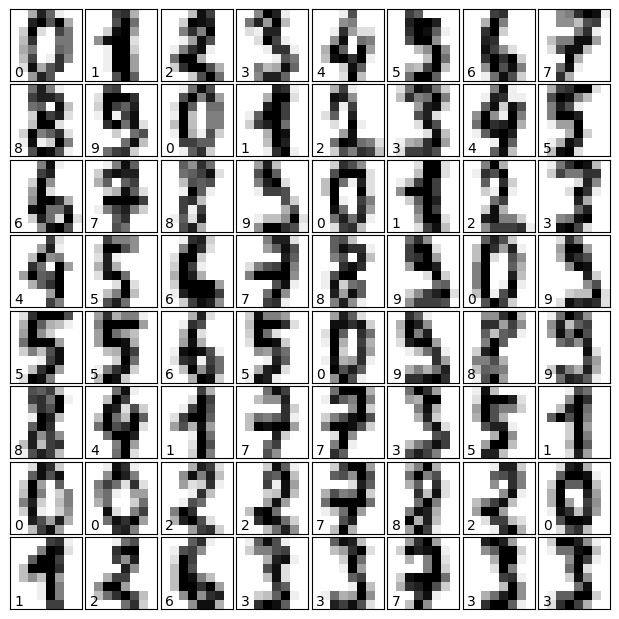

In [2]:
import matplotlib.pyplot as plt

# Let's visualize the data. It's little bit more involved than the simple scatter-plot we used above, but we can do it rather quickly.
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[]) #xticks=[], yticks=[] to remove ticks in the figure

    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')

    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

(Example 2) MNIST Handwritten Digit Classification Dataset (with Tensorflow & Pytorch)

> Data Set Information:
>
> The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST.
>
> It is grayscale images of handwritten single digits between 0 and 9.
>
> The images have been size-normalized and centered in a fixed-size (28 x 28)
>
> The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively.


In [3]:
!pip install -q tensorflow-datasets tensorflow

In [4]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Construct a tf.data.Dataset
# tfds.load
# 1. The easiest way of loading a dataset is tfds.load. It will:
# 2. Download the data and save it as tfrecord files.
# 3. Load the tfrecord and create the tf.data.Dataset.
ds, info = tfds.load('mnist', split='train', with_info=True)
#ds = ds.take(1)  # Only take a single example
tfds.as_dataframe(ds.take(10), info)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


,image,label
0,,4
1,,1
2,,0
3,,7
4,,8
5,,1
6,,2
7,,7
8,,1
9,,6


In [5]:
import torch
import torchvision
from torchvision.datasets import MNIST

train_dataset = MNIST(root='data/', download=True)
test_dataset = MNIST(root='data/', train=False)

print(len(train_dataset), len(test_dataset))

100%|██████████| 9912422/9912422 [00:00<00:00, 303036591.50it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 105152512.00it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 172655567.12it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 14665534.08it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

60000 10000


### 1.2 Loading CSV Files

#### California Housing
---

#### Source
This dataset is a modified version of the California Housing dataset available from [Luís Torgo's page](http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html) (University of Porto). Luís Torgo obtained it from the StatLib repository (which is closed now). The dataset may also be downloaded from StatLib mirrors.

This dataset appeared in a 1997 paper titled *Sparse Spatial Autoregressions* by Pace, R. Kelley and Ronald Barry, published in the *Statistics and Probability Letters* journal. They built it using the 1990 California census data. It contains one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

---
#### Tweaks
The dataset in this directory is almost identical to the original, with two differences:

* 207 values were randomly removed from the `total_bedrooms` column, so we can discuss what to do with missing data.
* An additional categorical attribute called `ocean_proximity` was added, indicating (very roughly) whether each block group is near the ocean, near the Bay area, inland or on an island. This allows discussing what to do with categorical data.

Note that the block groups are called "districts" in the Jupyter notebooks, simply because in some contexts the name "block group" was confusing.

#### Data description

    >>> housing.info()
    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 20640 entries, 0 to 20639
    Data columns (total 10 columns):
    longitude             20640 non-null float64
    latitude              20640 non-null float64
    housing_median_age    20640 non-null float64
    total_rooms           20640 non-null float64
    total_bedrooms        20433 non-null float64
    population            20640 non-null float64
    households            20640 non-null float64
    median_income         20640 non-null float64
    median_house_value    20640 non-null float64
    ocean_proximity       20640 non-null object
    dtypes: float64(9), object(1)
    memory usage: 1.6+ MB

    >>> housing["ocean_proximity"].value_counts()
    <1H OCEAN     9136
    INLAND        6551
    NEAR OCEAN    2658
    NEAR BAY      2290
    ISLAND           5
    Name: ocean_proximity, dtype: int64

    >>> housing.describe()
              longitude      latitude  housing_median_age   total_rooms  \
    count  16513.000000  16513.000000        16513.000000  16513.000000
    mean    -119.575972     35.639693           28.652335   2622.347605
    std        2.002048      2.138279           12.576306   2138.559393
    min     -124.350000     32.540000            1.000000      6.000000
    25%     -121.800000     33.940000           18.000000   1442.000000
    50%     -118.510000     34.260000           29.000000   2119.000000
    75%     -118.010000     37.720000           37.000000   3141.000000
    max     -114.310000     41.950000           52.000000  39320.000000

           total_bedrooms    population    households  median_income
    count    16355.000000  16513.000000  16513.000000   16513.000000
    mean       534.885112   1419.525465    496.975050       3.875651
    std        412.716467   1115.715084    375.737945       1.905088
    min          2.000000      3.000000      2.000000       0.499900
    25%        295.000000    784.000000    278.000000       2.566800
    50%        433.000000   1164.000000    408.000000       3.541400
    75%        644.000000   1718.000000    602.000000       4.745000
    max       6210.000000  35682.000000   5358.000000      15.000100


#### 1.2.1 From a local drive

To upload from your local drive, start with the following code:

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
!ls -al
!pwd

total 1412
drwxr-xr-x 1 root root    4096 Apr 11 06:27 .
drwxr-xr-x 1 root root    4096 Apr 11 06:19 ..
drwxr-xr-x 4 root root    4096 Apr  7 13:29 .config
drwxr-xr-x 3 root root    4096 Apr 11 06:25 data
-rw-r--r-- 1 root root 1423529 Apr 11 06:27 housing.csv
drwxr-xr-x 1 root root    4096 Apr  7 13:30 sample_data
/content


In [ ]:
import os
import pandas as pd

HOUSING_PATH = "/content"

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()
housing.head() # The head() function is used to get the first n rows. # DataFrame.head(self, n=5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### 1.2.3 From Google Drive

The example below shows how to mount your Google Drive on your runtime using an authorization code, and how to write and read files there.

This only supports reading, writing, and moving files; to programmatically modify sharing settings or other metadata, use one of the other options below.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/AI_Spring2023

assignment1.zip		shoe.png
cat_gif.gif		SKKU_AI_2023_dataloader_backpropagation_and_DFNs.ipynb
frame1.png		SKKU_AI_2023_Machine_Learning_Basics_1.ipynb
frame2.png		SKKU_AI_2023_Machine_Learning_Basics_2.ipynb
frame3.png		SKKU_AI_2023_Useful_Python_Libs_4_Students.ipynb
housing.csv		SKKU_AI_2023_Useful_Python_Libs.ipynb
lab3-probability.ipynb	SKKU_AI_Python_Review_Spring2023.ipynb
shoe.jpg


In [ ]:
import os
import pandas as pd

HOUSING_PATH = "/content/drive/MyDrive/K_Mooc_Deep_Learning_Programming_with_Python"

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 1.3 DataLoader & Custom Dataset (PyTorch)

#### DATASETS & DATALOADERS (From Pytorch Tutorials)
##### https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

Code for processing data samples can get **messy and hard to maintain**;

We ideally want our dataset code to be decoupled from our model training code for better readability and modularity.

PyTorch provides two data primitives: torch.utils.data.DataLoader and torch.utils.data.Dataset that allow you to use pre-loaded datasets as well as your own data.

**Dataset stores the samples and their corresponding labels**
**DataLoader wraps an iterable around the Dataset to enable easy access to the samples**

#### 1.3.1 Custom Dataset Fundamentals
(The below information from https://stanford.edu/~shervine/blog/pytorch-how-to-generate-data-parallel)

##### Loading a custom dataset without dataloader

Before learning a datasloader, your PyTorch script probably looked like this:
```python
# Load entire dataset
X, y = torch.load('some_training_set_with_labels.pt')

# Train model
for epoch in range(max_epochs):
    for i in range(n_batches):
        # Local batches and labels
        local_X, local_y = X[i*n_batches:(i+1)*n_batches,], y[i*n_batches:(i+1)*n_batches,]

        # Your model
        [...]
```

or even this:


```python
# Unoptimized generator
training_generator = SomeSingleCoreGenerator('some_training_set_with_labels.pt')

# Train model
for epoch in range(max_epochs):
    for local_X, local_y in training_generator:
        # Your model
        [...]
```

This exercise is about optimizing the entire data generation process, so that it does not become a bottleneck in the training procedure.

From https://github.com/utkuozbulak/pytorch-custom-dataset-examples

The first and foremost part is creating a dataset class.

```python
from torch.utils.data.dataset import Dataset

class MyCustomDataset(Dataset):
    def __init__(self, ...):
        # stuff

    def __getitem__(self, index):
        # stuff
        return (img, label)

    def __len__(self):
        return count # of how many examples(images?) you have
```

This is the skeleton that you have to fill to have a custom dataset. A dataset must contain following functions to be used by data loader later on.

* __init__() function is where the initial logic happens like reading a csv, assigning transforms, filtering data, etc.
* __getitem__() function returns the data and labels. This function is called from dataloader like this:

```python
img, label = MyCustomDataset.__getitem__(99)  # For 99th item
```

Here, MyCustomDataset returns two things, an image and a label but that does not mean that __getitem__() is only restricted to return those. Depending on your application you can return many things.

An important thing to note is that __getitem__() returns a specific type for a single data point (like a tensor, numpy array etc.), otherwise, in the data loader you will get an error like:

TypeError: batch must contain tensors, numbers, dicts or lists; found <class 'PIL.PngImagePlugin.PngImageFile'>

* __len__() returns count of samples you have.

-----
##### Example

**Creating a dataset**

```python
import torch

class Dataset(torch.utils.data.Dataset):
  'Characterizes a dataset for PyTorch'
  def __init__(self, list_IDs, labels):
        'Initialization'
        self.labels = labels
        self.list_IDs = list_IDs

  def __len__(self):
        'Denotes the total number of samples'
        return len(self.list_IDs)

  def __getitem__(self, index):
        'Generates one sample of data'
        # Select sample
        ID = self.list_IDs[index]

        # Load data and get label
        X = torch.load('data/' + ID + '.pt')
        y = self.labels[ID]

        return X, y
```



**Load the created dataset using DataLoader**

* **batch_size**, which denotes the number of samples contained in each generated batch.
* **shuffle**. If set to True, we will get a new order of exploration at each pass (or just keep a linear exploration scheme otherwise). Shuffling the order in which examples are fed to the classifier is helpful so that batches between epochs do not look alike. Doing so will eventually make our model more robust.
* **num_workers**, which denotes the number of processes that generate batches in parallel. A high enough number of workers assures that CPU computations are efficiently managed, i.e. that the bottleneck is indeed the neural network's forward and backward operations on the GPU (and not data generation).

```python
from my_classes import Dataset


# CUDA for PyTorch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
torch.backends.cudnn.benchmark = True

# Parameters
params = {'batch_size': 64,
          'shuffle': True,
          'num_workers': 6}
max_epochs = 100

# Datasets
partition = # IDs
labels = # Labels

# Generators
training_set = Dataset(partition['train'], labels)
training_generator = torch.utils.data.DataLoader(training_set, **params)

validation_set = Dataset(partition['validation'], labels)
validation_generator = torch.utils.data.DataLoader(validation_set, **params)

# Loop over epochs
for epoch in range(max_epochs):
    # Training
    for local_batch, local_labels in training_generator:
        # Transfer to GPU
        local_batch, local_labels = local_batch.to(device), local_labels.to(device)

        # Model computations
        [...]

    # Validation
    with torch.set_grad_enabled(False):
        for local_batch, local_labels in validation_generator:
            # Transfer to GPU
            local_batch, local_labels = local_batch.to(device), local_labels.to(device)

            # Model computations
            [...]
```

#### Using Torchvision Transforms
In most of the examples you see `transforms = None` in the `__init__()`, this is used to apply torchvision transforms to your data/image. You can find the extensive list of the transforms [here](http://pytorch.org/docs/0.2.0/torchvision/transforms.html) and [here](https://github.com/pytorch/vision/blob/master/torchvision/transforms/transforms.py). The most common usage of transforms is like this:

```python
from torch.utils.data.dataset import Dataset
from torchvision import transforms

class MyCustomDataset(Dataset):
    def __init__(self, ..., transforms=None):
        # stuff
        ...
        self.transforms = transforms

    def __getitem__(self, index):
        # stuff
        ...
        data = # Some data read from a file or image
        if self.transforms is not None:
            data = self.transforms(data)
        # If the transform variable is not empty
        # then it applies the operations in the transforms with the order that it is created.
        return (img, label)

    def __len__(self):
        return count # of how many data(images?) you have

if __name__ == '__main__':
    # Define transforms (1)
    transformations = transforms.Compose([transforms.CenterCrop(100), transforms.ToTensor()])
    # Call the dataset
    custom_dataset = MyCustomDataset(..., transformations)

```

#### Another Way to Use Torchvision Transforms

Personally, some people don't like having dataset transforms outside the dataset class. So, instead of using transforms like the example above, you can also use it like:

```python
from torch.utils.data.dataset import Dataset
from torchvision import transforms

class MyCustomDataset(Dataset):
    def __init__(self, ...):
        # stuff
        ...
        # (2) One way to do it is define transforms individually
        # When you define the transforms it calls __init__() of the transform
        self.center_crop = transforms.CenterCrop(100)
        self.to_tensor = transforms.ToTensor()

        # (3) Or you can still compose them like
        self.transformations = \
            transforms.Compose([transforms.CenterCrop(100),
                                transforms.ToTensor()])

    def __getitem__(self, index):
        # stuff
        ...
        data = # Some data read from a file or image

        # When you call the transform for the second time it calls __call__() and applies the transform
        data = self.center_crop(data)  # (2)
        data = self.to_tensor(data)  # (2)

        # Or you can call the composed version
        data = self.transformations(data)  # (3)

        # Note that you only need one of the implementations, (2) or (3)
        return (img, label)

    def __len__(self):
        return count # of how many data(images?) you have

if __name__ == '__main__':
    # Call the dataset
    custom_dataset = MyCustomDataset(...)

```

#### Incorporating Data From a csv with Pandas

Let's say we want to read some data from a csv with pandas. The first example is of having a csv file like following (without the headers, even though it really doesn't matter), that contains file name, label(class) and an extra operation indicator and depending on this extra operation flag we do some operation on the image.

```
 File Name      | Label           | Extra Operation  |
| ------------- |:-------------:| :-----:|
| tr_0.png      | 5 | TRUE |
| tr_1.png      | 0      |   FALSE |
| tr_1.png      | 4      |    FALSE |
```

If we want to build a custom dataset that reads image locations form this csv file then we can do something like following.

```python
class CustomDatasetFromImages(Dataset):
    def __init__(self, csv_path):
        """
        Args:
            csv_path (string): path to csv file
            img_path (string): path to the folder where images are
            transform: pytorch transforms for transforms and tensor conversion
        """
        # Transforms
        self.to_tensor = transforms.ToTensor()
        # Read the csv file
        self.data_info = pd.read_csv(csv_path, header=None)
        # First column contains the image paths
        self.image_arr = np.asarray(self.data_info.iloc[:, 0])
        # Second column is the labels
        self.label_arr = np.asarray(self.data_info.iloc[:, 1])
        # Third column is for an operation indicator
        self.operation_arr = np.asarray(self.data_info.iloc[:, 2])
        # Calculate len
        self.data_len = len(self.data_info.index)

    def __getitem__(self, index):
        # Get image name from the pandas df
        single_image_name = self.image_arr[index]
        # Open image
        img_as_img = Image.open(single_image_name)

        # Check if there is an operation
        some_operation = self.operation_arr[index]
        # If there is an operation
        if some_operation:
            # Do some operation on image
            # ...
            # ...
            pass
        # Transform image to tensor
        img_as_tensor = self.to_tensor(img_as_img)

        # Get label(class) of the image based on the cropped pandas column
        single_image_label = self.label_arr[index]

        return (img_as_tensor, single_image_label)

    def __len__(self):
        return self.data_len

if __name__ == "__main__":
    # Call dataset
    custom_mnist_from_images =  \
        CustomDatasetFromImages('../data/mnist_labels.csv')
```

##2. BackPropagation and Gradient Descent

**This artical is adopted from: https://colab.research.google.com/github/jigsawlabs-student/pytorch-intro-curriculum/blob/main/5-training-mathematically/20-backpropagation-and-gradient-descent.ipynb#scrollTo=inner-light**

### 2.1 Setup and Prediction with forward propagation

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/jigsawlabs-student/pytorch-intro-curriculum/main/5-training-mathematically/cell_multiple.csv"
df = pd.read_csv(url)

In [ ]:
df[:2]

,mean_area,mean_concavity,is_cancerous
0,1.001,0.3001,1
1,1.326,0.0869,1


In [ ]:
# convert it into tensors.
import torch
X_tensor = torch.tensor(df[['mean_area', 'mean_concavity']].values).float()
y_tensor = torch.tensor(df['is_cancerous']).float()

# Then we select our first observation.
first_x = X_tensor[0]
first_y = y_tensor[0]

first_x, first_y

(tensor([1.0010, 0.3001]), tensor(1.))

### The prediction
Ok, so now that we downloaded our data, converted it into tensors, and selected the first observation, it's time to make our prediction.

Let's define the components of our hypothesis function:

In [ ]:
def linear_fn(x, w, b):
    return x @ w + b

def activation_fn(z):
    return torch.sigmoid(z)

And then we can initialize the related weight vectors and bias term for a single neuron.

In [ ]:
w = torch.tensor([.5, .3]).float()
b = torch.tensor(-2.).float()

And make our prediction with just our first datapoint.

In [ ]:
z = linear_fn(first_x, w, b)
z

tensor(-1.4095)

In [ ]:
y_hat = activation_fn(z)
y_hat

tensor(0.1963)

Now this step of calculating the output at each layer is called **forward propagation**.  We are passing data through each layer until we get to a prediction -- above $\hat{y} = .1963$.  So that's it. Forward propagation is just passing data through the layers of the hypothesis function of our neural network.

### Reviewing the gradient

Ok, let's keep going with our review, moving onto the gradient.  Now, of course, the parameters of our neural network, $w$ and $b$ were just set randomly by us above.  We'll need to use gradient descent to find the parameters that minimize the output from our cost function.  As we saw in the past lesson, we can summarize our gradient descent formula as the following:

$$ \theta = \theta - \eta \frac{\delta J}{\delta \theta}  $$

And remember that this term $\frac{\delta J}{\delta \theta}$ is a vector of each parameter's partial derivative.

Our partial derivatives really consist of the following $\frac{\delta J}{\delta w}$ and $\frac{\delta J}{\delta b}$:

$$\frac{\delta J}{\delta w} = \frac{\delta J}{\delta \sigma} * \frac{\delta \sigma}{\delta z} * \frac{\delta z}{\delta w}$$

$$\frac{\delta J}{\delta b} = \frac{\delta J}{\delta \sigma} * \frac{\delta \sigma}{\delta z} * \frac{\delta z}{\delta b}$$

And these component derivatives are the following:

In [ ]:
import torch
def delta_J_delta_sigma(y_hat, y):
    return torch.sum(2*(y_hat - y))

In [ ]:
def delta_sigma_delta(z):
    return torch.sigmoid(z)*(1 - torch.sigmoid(z))

In [ ]:
def delta_z_delta_w(x): # z = wx + b
    return x

In [ ]:
def delta_z_delta_b(): # z = wx + b
    return 1

So then we can calculate $\frac{\delta J}{\delta w}$ by multiplying the component derivatives together.

In [ ]:
w_grad = delta_z_delta_w(first_x)*delta_sigma_delta(z)*delta_J_delta_sigma(y_hat, first_y)
w_grad

tensor([-0.2539, -0.0761])

And similarly we can calculate $\frac{\delta J}{\delta b}$ by multiplying the component derivatives together.

In [ ]:
b_grad = delta_z_delta_b()*delta_sigma_delta(z)*delta_J_delta_sigma(y_hat, first_y)
b_grad

tensor(-0.2536)

### Onto backpropagation

Now backpropagation is easiest to understand by example.  Remember that these were our layers of our neural network:

* $z(x_i) = w_1*x_i $
* $\sigma(z) =  \frac{1}{1 + e^{-z(x)}} $
* $ J(\hat{y}, y) = \sum  (y - \hat{y})^2 $

This time instead of simply multiplying together the component derivatives at the very end, we'll work backwards through our layers, and **calculate each layer's impact on our cost function $J$**.
> So working backwards, we start by seeing how our last layer, $\sigma$, has an impact on our cost function.  Then see how a change in $z$ has an impact on the cost function $J$, and then see how a change in parameters $w$ and $b$ impact the cost function.  In other words, we'll calculate:

> * $\frac{\delta J}{\delta \sigma}$

> * $\frac{\delta J}{\delta z} = \frac{\delta \sigma}{\delta z}*\frac{\delta J}{\delta \sigma}$

> * $\frac{\delta J}{\delta w} = \frac{\delta z}{\delta w}*\frac{\delta J}{\delta z}$

Let's understand this approach better by moving on with the example.  So we work backwards, first calculating the impact of $\sigma$ on the cost function.

1. Calculate the impact of a small change in $\sigma$ on $J$, $\frac{\delta J}{\delta \sigma}$.

In [ ]:
dj_dsig = delta_J_delta_sigma(y_hat, first_y)
dj_dsig

tensor(-1.6074)

> This is exactly the same calclulation $\frac{\delta J}{\delta \sigma}$ that we calculated previously, so we just reuse the function from above.

2. Then we find the impact of a small change in the output of the linear layer $z$ on $J$, $\frac{\delta J}{\delta z}$.

This is the formula: $\frac{\delta J}{\delta z} = \frac{\delta \sigma}{\delta z}*\frac{\delta J}{\delta \sigma}$.

Let's think about how the formula above makes sense.  We want to find a change in $z$'s impact on $J$.  And remember, these are our layers.

* $z(x_i) = w_1*x_i $
* $\sigma(z) =  \frac{1}{1 + e^{-z(x)}} $
* $ J(\hat{y}, y) = \sum  (y - \hat{y})^2 $

So to find $z$'s impact on $J$, this is the impact that a change in $z's$ output has on the activation layer $\sigma$, $\frac{\delta \sigma}{\delta z}$, multiplied by $\sigma$'s impact on $J$, $\frac{\delta J}{\delta \sigma}$.

And because we worked backwards, we just calculated $\frac{\delta J}{\delta \sigma}$ in step 1.  So now we just need to calculate $\frac{\delta \sigma}{\delta z}$.

In [ ]:
dsig_dz = delta_sigma_delta(z)
dj_dz = dsig_dz*dj_dsig
dj_dz

tensor(-0.2536)

Next let's add some terms to our two component derivatives in the formula: $\frac{\delta J}{\delta z} = \frac{\delta \sigma}{\delta z}*\frac{\delta J}{\delta \sigma}$.

* We'll call our newly calculated derivative $\frac{\delta \sigma}{\delta z}$ our **local derivative**, and
* We'll call the derivative we calculated in the previous layer $\frac{\delta J}{\delta \sigma}$ our **upstream derivative**.

As we'll see, we'll continue to use this approach as we move down through our layers: calculate the new local derivative and multiply it by the derivative upstream derivative.

Ok, let's keep going and calculate how the next layer down has an impact on $J$.

Now to make this calculation, our formula is: $\frac{\delta J}{\delta w} = \frac{\delta z}{\delta w}*\frac{\delta J}{\delta z}$.  So once again, it's (1) our local derivative where we find $w's$ impact on $z$, and then we multiply by the derivative we just calculated upstream, $\frac{\delta J}{\delta z}$, $z$'s impact on our cost function $J$.

In [ ]:
dz_dw = delta_z_delta_w(first_x)
dj_dw = dz_dw*dj_dz
dj_dw

tensor([-0.2539, -0.0761])

> So the partial derivative with respect $w_1$ is $ \frac{\delta J}{\delta w_1} = -.2539$, and the partial derivative with respect to the second parameter is $ \frac{\delta J}{\delta w_2} = -.0761$.  And we calculated this by working backwards through our layers, and repeatedly multiplying the local gradient by the upstream gradient.

Notice that we calculated the same number above, when multiplying all three terms together: $\frac{\delta J}{\delta w} = \frac{\delta J}{\delta \sigma} * \frac{\delta \sigma}{\delta z} * \frac{\delta z}{\delta w}$.

In [ ]:
dj_dsig*dsig_dz*dz_dw

tensor([-0.2539, -0.0761])

But what's nice about this new technique is that **we can reuse our upstream gradient $\frac{\delta J}{\delta z}$**, when calculating $\frac{\delta J}{\delta w}$ and $\frac{\delta J}{\delta b}$.  Let's see this.

4. Find the impact of a change in $b$ on $J$, that is $\frac{\delta J}{\delta b}$.

This again is our local derivative multiplied by the same directly upstream derivative $\frac{\delta J}{\delta z}$.

In [ ]:
dz_db = delta_z_delta_b()
dj_db = dz_db*dj_dz
dj_db

tensor(-0.2536)

So this is backpropagation.  It's a small trick that allows us to **reuse some of our earlier calculations**.  With backpropagation, we start with our top most layer, here $\frac{\delta J}{\delta \sigma}$, and then move down through our layers each time calculating each layer's impact on the cost function $J$ by multiplying the local derivative by the direectly upstream derivative.